# Applied Machine Learning (INFR11211) 

# Lab 2: Data Exploration

In this lab we will perform exploratory data analysis, visualisation with the spam filtering dataset used in Lab 1. 
Then we will implement an unsupervised learning algotirhm called principal component analysis (PCA) on the Landsat dataset.
All the datasets that you will need for this lab are located within the `datasets` directory.

Let's import the packages:

In [1]:
# Import packages
import os
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from pandas.api.types import CategoricalDtype
%matplotlib inline

*Clarification*:

* The `%matplotlib inline` command is a special ipython [built in magic command](http://ipython.readthedocs.io/en/stable/interactive/magics.html) which forces the matplotlib plots to be rendered within the notebook.

## Part 1: Data analysis and visualisation with Spambase dataset

Following Lab 1, we first load the dataset and delete the `capital_run_length_average`, `capital_run_length_longest` and  `capital_run_length_total` features. 

In [2]:
# Load the dataset
data_path = os.path.join(os.getcwd(), 'datasets', 'spambase.csv')
spambase = pd.read_csv(data_path, delimiter = ',')
spambase.drop(["capital_run_length_average", "capital_run_length_longest", 
                          "capital_run_length_total"], axis=1, inplace=True)

### ========== Question 1.1 ==========

Now let's get a feeling of the distribution of ham (i.e. valid) vs. spam emails. We can do this by using a [countplot](https://seaborn.github.io/generated/seaborn.countplot.html?highlight=countplot#seaborn.countplot) in seaborn. In the code cell below, write code to:

**a)** Produce a seaborn [countplot](https://seaborn.github.io/generated/seaborn.countplot.html?highlight=countplot#seaborn.countplot) object that shows the distribution of ham/spam e-mails. Assign it to a variable (e.g. `ax` to emphasise it is a [matplotlib.axes.Axes](https://matplotlib.org/stable/api/axes_api.html) object)
  
**b)** In the same cell, modify the labels on the x axis (`xticklabels`) to `Ham` and `Spam` (by default they should be set to `0.0` and `1.0`). *Hint: Axes objects have a [`set_xticklabels`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xticklabels.html) method!* 
  
**c)** Finally, again in the same cell, remove the `is_spam` label from the x axis (`xlabel`) since it does not add any information to the graph

You may notice `<matplotlib.text.Text at ...memory_location...>` printed by the ipython notebook. This is just because the notebook is inferring how to display the last object in the cell. To explicitly plot the Axes object, use the `matplotlib.pyplot.show()` method at the very end of the cell, i.e. `plt.show()` (we imported the `matplotlib.pyplot` module as `plt` above)

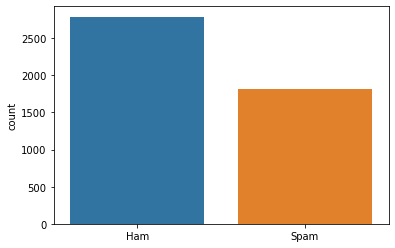

In [3]:
# Student needs to provide code similar to below
ax = sns.countplot(x='is_spam', data=spambase)
ax.set_xticklabels(['Ham', 'Spam'])
plt.xlabel('')
plt.show()


## Visualisation

Now we want to get a feeling for how the presence or absence of some specific words could affect the outcome (whether an email is classifed as *ham* or *spam*). We will be focusing on three specific words, namely `make`, `internet` and `edu`. As with Lab 1, we first transform the dataset by binarizing the values.

In [4]:
# Convert all features to boolen values
spambase_binary = spambase.copy(deep=True)
spambase_binary[spambase_binary > 0] = 1

### ========== Question 1.2 ==========

**a)** Using seaborn, produce one figure with three [countplots](https://seaborn.github.io/generated/seaborn.countplot.html?highlight=countplot#seaborn.countplot), one for each of the frequency variables for the words `make`, `internet` and `edu`. For each variable, the count plot should have two bars: the number of emails containing the word (i.e. the variable = 1), and the number not containing that word (i.e. the variable = 0).

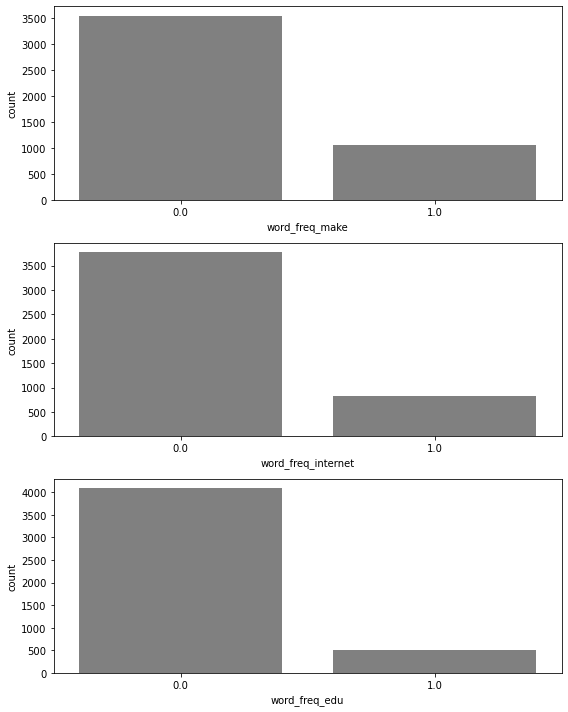

In [5]:
# Student needs to provide code similar to below
words_of_interest = ['word_freq_' + word for word in ['make', 'internet', 'edu']]
n_words = len(words_of_interest)
plt.subplots(n_words, figsize=(8,10))
for i, word in enumerate(words_of_interest):
    plt.subplot(n_words,1,i+1)
    # Grey colour chosen such that the meaning of 1 and 0 is
    # not confused between plots. It is good practice to use
    # colour only when it is meaningful, and to not mix 
    # colour meanings between similar plots
    sns.countplot(x=word, data=spambase_binary, color='Gray') 
plt.tight_layout()
plt.show()


**b)** Repeat the above but split the bars showing the proportion of emails that are spam/ham. *Hint*: This only requires you to use the `hue` input argument to use different colours for the `is_spam` variable.

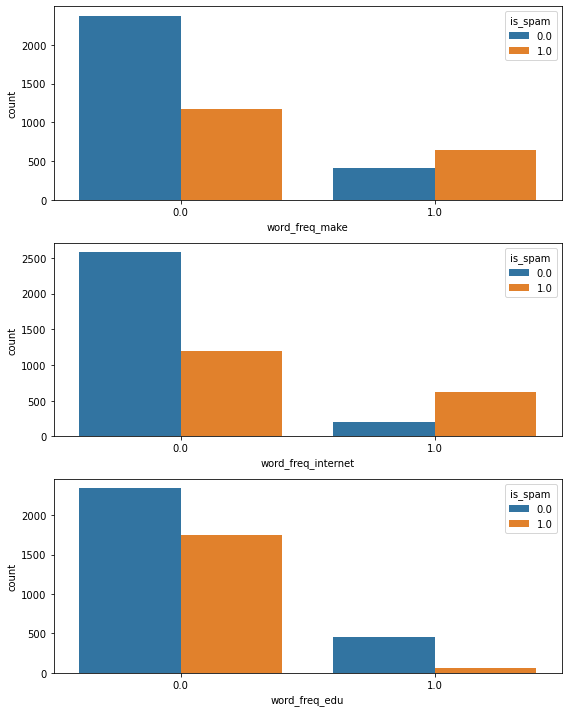

In [6]:
# Student needs to provide code similar to below
words_of_interest = ['word_freq_' + word for word in ['make', 'internet', 'edu']]
n_words = len(words_of_interest)
plt.subplots(n_words, figsize=(8,10))
for ii, word in enumerate(words_of_interest):
    plt.subplot(n_words, 1, ii+1)
    sns.countplot(x=word, hue='is_spam', data=spambase_binary)
plt.tight_layout()
plt.show()


## Part 2:  Dimensionality reduction using PCA

Now we will perform PCA on Landsat data. For information about the Landsat data you can read [this description](http://www.inf.ed.ac.uk/teaching/courses/dme/html/landsat.html).

### ========== Question 2.1 ==========
1. With pandas, read the csv dataset located at './datasets/landsat.csv'
1. Split the data into the features `X` (pandas dataframe), and the labels `y` (easier to make it a numpy array)
1. Give it a once over
    * Get a feel for the size
    * Check it looks ok
    * Understand what the features are
    * Plot the class distribution

*Hint: You might need to use the following class labels*:

In [7]:
# Class Categories run from 1 through 7 inclusive (i.e. they are not 0 indexed!)
class_categories = ['red soil', 'cotton crop', 'grey soil', 'damp grey soil', 'soil with vegetation stubble',
                    'mixture class (all types present)', 'very damp grey soil']
class_labels = [1, 2, 3, 4, 5, 6, 7]

*TIP: Do not assume that all labels are present!*

Number of instances: 4435, number of features: 36
          pixel1_1     pixel1_2     pixel1_3     pixel1_4     pixel2_1  \
count  4435.000000  4435.000000  4435.000000  4435.000000  4435.000000   
mean     69.473957    83.855242    99.322886    82.555581    69.208794   
std      13.649635    22.725079    16.672166    18.695450    13.552423   
min      40.000000    27.000000    56.000000    33.000000    40.000000   
25%      60.000000    71.000000    85.000000    70.000000    60.000000   
50%      68.000000    87.000000   101.000000    83.000000    68.000000   
75%      80.000000   103.000000   113.000000    92.000000    80.000000   
max     104.000000   137.000000   140.000000   154.000000   102.000000   

          pixel2_2     pixel2_3     pixel2_4     pixel3_1     pixel3_2  ...  \
count  4435.000000  4435.000000  4435.000000  4435.000000  4435.000000  ...   
mean     83.499436    99.174521    82.480496    68.963472    83.131003  ...   
std      22.811809    16.627583    18.714272  

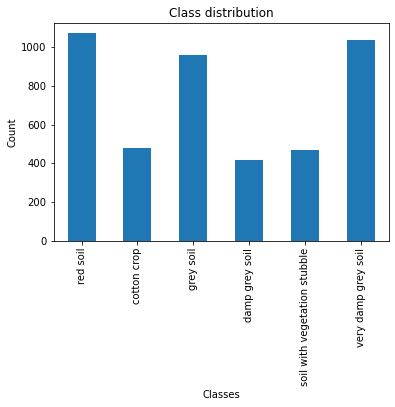

,count,mean,std,min,25%,50%,75%,max
band,,,,,,,,
1,39915.0,69.128022,13.556420,39.0,60.0,68.0,80.0,104.0
2,39915.0,83.450482,22.790675,27.0,71.0,85.0,103.0,137.0
3,39915.0,99.188876,16.689490,50.0,85.0,101.0,113.0,145.0
4,39915.0,82.566429,18.836535,29.0,69.0,81.0,92.0,157.0


In [8]:
# Student needs to provide code similar to below
# (1) - Read Data
data_path = os.path.join(os.getcwd(), 'datasets', 'landsat.csv')
landsat = pd.read_csv(data_path, delimiter = ',')
# (2) - Split
X = landsat.drop('class', axis=1)
y = landsat['class'].values
# (3) - Exploratory Analysis
print('Number of instances: {}, number of features: {}'.format(X.shape[0], X.shape[1]))
print(landsat.describe())
# Notice that 'class' is categorical (not numeric) and count
fig, ax = plt.subplots()
landsat['class'].astype('category').value_counts(sort=False).plot(kind='bar', ax=ax) # Create Counts
labels = [int(ticklabel.get_text()) for ticklabel in ax.get_xticklabels()] # Get the current labels
ax.set_xticklabels([class_categories[l-1] for l in labels])
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Class distribution')
plt.show()
# Advanced (not expecting you to have done this) - describe pixel values by band
landsat_melt = pd.melt(landsat, id_vars=['class'], var_name='pixel_label')
landsat_melt['band'] = landsat_melt['pixel_label'].str[-1]
landsat_melt.groupby('band')['value'].describe()


### ========== Question 2.2 ==========

*TIP - don't get stuck on this, move on after 10 mins or so (it's not critical)*

Plot a few datapoints. You'll need to understand and reshape the datapoints to do this. *Hint: try reading the [detailed description](http://www.inf.ed.ac.uk/teaching/courses/dme/html/satdoc.txt), it'll take you 2 minutes...`plt.imshow()` or `sns.heatmap()` (with an `ax.invert_yaxis()`) may also be handy ;)*

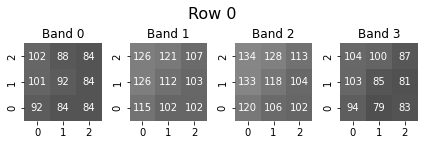

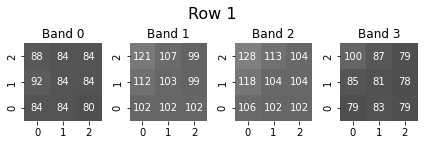

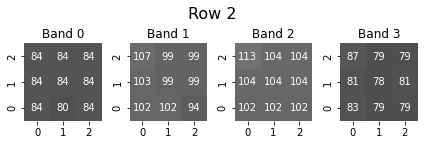

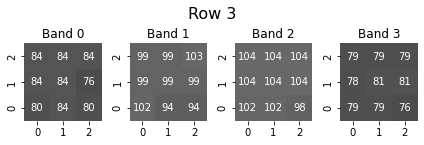

In [9]:
# Student needs to provide code similar to below
def get_images(row, bands=None):    
    # Get each of the 4 3x3 images contained in the row
    # Pixels are labeled 1 to 9 from topleft to bottom right
    # They are measured at 4 spectral bands
    #
    # row - a numpy array
    if bands is None:
        img = [[]] * 4
        for ii in range(4):
            img[ii] = row[[4*p + ii for p in range(9)]].values.reshape((3,3)).astype(int)
    elif isinstance(bands, int):
        img = row[[4*p + bands for p in range(9)]].values.reshape((3,3)).astype(int)
    elif isinstance(bands, list):
        img = [[]] * len(bands)
        for ii, band in enumerate(bands):
            img[ii] = row[[4*p + band for p in range(9)]].values.reshape((3,3)).astype(int)
    return img
        
for ii in range(4):
    fig, ax = plt.subplots(1,4)
    plt.suptitle('Row {}'.format(ii), fontsize=16)
    for jj, img in enumerate(get_images(landsat.iloc[ii,:])):
        ax[jj] = sns.heatmap(img, annot=True, fmt="d", ax=ax[jj], vmin=0, vmax=255, 
                    cbar=False, square=True, cmap=plt.cm.gray)
        ax[jj].invert_yaxis()
        ax[jj].set_title('Band {}'.format(jj))
    plt.tight_layout()
    plt.subplots_adjust(top=1.4)


## Principal component analysis (PCA)

The landsat data is 36 dimensional, so we cannot visualise it, with respect to class, on a nice two dimensional plot. Additionally, as dimensionality increases, euclidean distance [becomes less meaningful](https://en.wikipedia.org/wiki/Curse_of_dimensionality#Distance_function)...

Perhaps if we found a lower dimensional subspace the data lies upon, we could more easily distinguish the datapoints...

### ========== Question 2.3 ==========

Have a look at the [PCA example](https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html) in the sklearn documentation. For more information about PCA and decomposition in general check out the sklearn [user guide on decomposition](https://scikit-learn.org/stable/modules/decomposition.html#pca).

We are going to project the data down to 2 dimensions and visualise it using PCA. 

1. Create `pca`, an instance of an [sklearn PCA object](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA), setting n_components to 2. 
1. Create `X_2d` by using the pca method `fit_transform()` and supplying the features `X` to fit and transform to 2d.

In [10]:
# Student needs to provide code similar to below
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)


### ========== Question 2.4 ==========

Let's visualise the data! Use a scatterplot and colour the datapoints by their class. You'll find [this example](https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html) very helpful to adapt. 

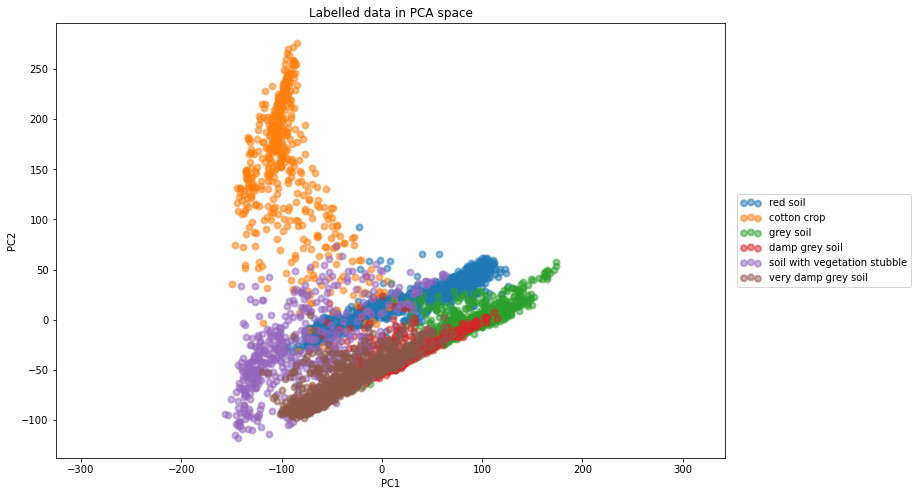

In [11]:
# Student needs to provide code similar to below
# We will need this...
sub_labels = [l for l in class_labels if l != 6]
sub_cats = [class_categories[label-1] for label in sub_labels]

# --- Basic Plot --- #
plt.figure(figsize=(12,8))
for label, cat in zip(sub_labels, sub_cats):
    plt.scatter(X_2d[y == label, 0], X_2d[y == label, 1], alpha=.5, lw=2, label=cat)
plt.axis('equal')
plt.legend(loc='center left', scatterpoints=3, bbox_to_anchor=[1.01, 0.5])
plt.title('Labelled data in PCA space')
plt.xlabel('PC1')
plt.ylabel('PC2')
top_plot = plt.gca()
plt.show()
